In [2]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
!pip install darts
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 424 kB 21.4 MB/s 
     |████████████████████████████████| 705 kB 58.2 MB/s 
     |████████████████████████████████| 1.8 MB 62.7 MB/s 
     |████████████████████████████████| 11.2 MB 58.1 MB/s 
     |████████████████████████████████| 44 kB 2.7 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 9.8 MB 60.4 MB/s 
     |████████████████████████████████| 1.6 MB 59.1 MB/s 
     |████████████████████████████████| 957 kB 62.8 MB/s 
     |████████████████████████████████| 5.9 MB 54.2 MB/s 
     |████████████████████████████████| 419 kB 69.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: tensorboa

In [2]:
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

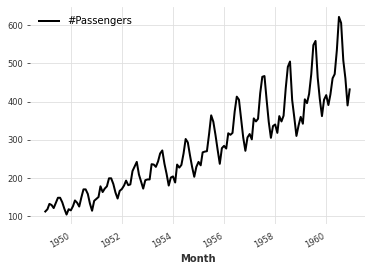

In [3]:
series = AirPassengersDataset().load()
series.plot()

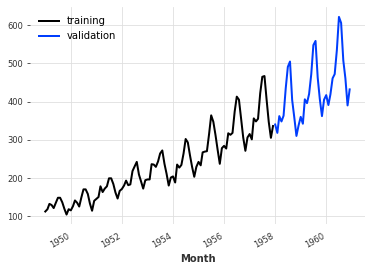

In [10]:
import pandas as pd
#The training series will be a TimeSeries containing values until January 1958 (excluded), and the validation series a TimeSeries containing the rest:
train, val = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
val.plot(label="validation")

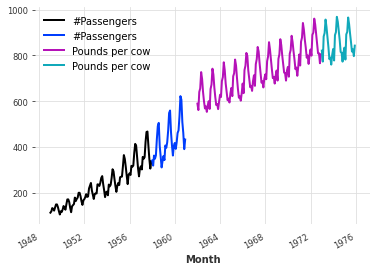

In [12]:
import numpy as np
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

series_air = AirPassengersDataset().load().astype(np.float32)
series_milk = MonthlyMilkDataset().load().astype(np.float32)

# set aside last 36 months of each series as validation set:
train_air, val_air = series_air[:-36], series_air[-36:]
train_milk, val_milk = series_milk[:-36], series_milk[-36:]

train_air.plot()
val_air.plot()
train_milk.plot()
val_milk.plot()

In [13]:
#First, let’s scale these two series between 0 and 1, as that will benefit most ML models. We will use a Scaler for this:

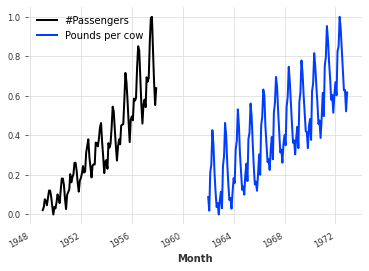

In [14]:
from darts.dataprocessing.transformers import Scaler

scaler = Scaler()
train_air_scaled, train_milk_scaled = scaler.fit_transform([train_air, train_milk])

train_air_scaled.plot()
train_milk_scaled.plot()

In [15]:
from darts.models import TCNModel
#The likelihoods specify which distribution the model will try to fit, along with potential prior values for the distributions’ parameters
from darts.utils.likelihood_models import LaplaceLikelihood

model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    likelihood=LaplaceLikelihood(),
)

model.fit(train_air_scaled, epochs=400, verbose=True);

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1769: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 166   
--------------------------------------------------

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Predicting: 3it [00:00, ?it/s]

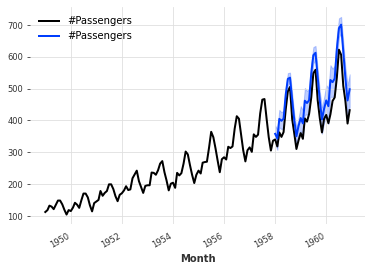

In [16]:
pred = model.predict(n=36, num_samples=500)

# scale back:
pred = scaler.inverse_transform(pred)

series_air.plot()
pred.plot()

In [32]:
pred1 = model.predict(n=36, num_samples=500)

# scale back:
pred1 = scaler.inverse_transform(pred)


Predicting: 3it [00:00, ?it/s]

In [59]:
from darts import models
from sklearn.metrics import accuracy_score

predictions = model.predict(n=36, num_samples=400)
#train_air, val_air
val_air_data = series_air[-36:]

accuracy_score(val_air,predictions)

Predicting: 3it [00:00, ?it/s]

ValueError: ignored

Predicting: 3it [00:00, ?it/s]

TypeError: ignored

In [61]:
val_air_data 

<TimeSeries (DataArray) (Month: 36, component: 1, sample: 1)>
array([[[340.]],

       [[318.]],

       [[362.]],

       [[348.]],

       [[363.]],

       [[435.]],

       [[491.]],

       [[505.]],

       [[404.]],

       [[359.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]], dtype=float32)
Coordinates:
  * Month      (Month) datetime64[ns] 1958-01-01 1958-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [72]:

predictions = model.predict(n=36, num_samples=400)

Predicting: 3it [00:00, ?it/s]

In [77]:
predictions.dtype

dtype('float32')

In [78]:
predictions = int(predictions)

TypeError: ignored